In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('housing.csv')

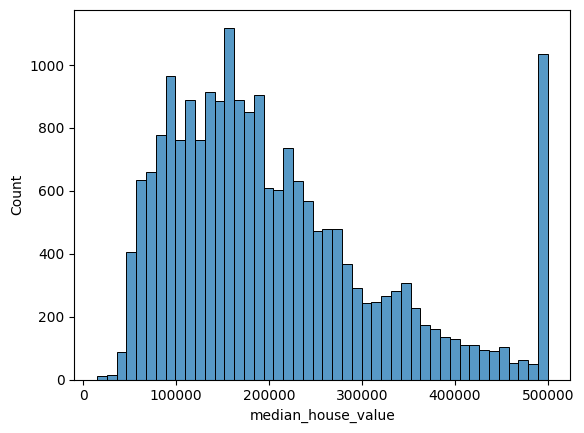

In [4]:
sns.histplot(data.median_house_value);

The feature `median_house_value` has a long tail.

In [5]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

Select only the features listed above.

In [7]:
data = data[features]

In [8]:
data.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

## Question 1
Find a feature with missing values. How many missing values does it have?

In [10]:
data.columns[data.isnull().any()]

Index(['total_bedrooms'], dtype='object')

In [12]:
np.sum(data['total_bedrooms'].isnull())

207

## Question 2
What's the median (50% percentile) for variable 'population'?

In [19]:
int(data.population.median())

1166

## Split the data

    Shuffle the initial dataset, use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Make sure that the target value ('median_house_value') is not in your dataframe.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.



In [18]:
data = data.sample(frac=1, random_state=42)

In [50]:
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [74]:
def prepare_data_zero(x, y):
    x['total_bedrooms'].replace([np.nan], 0, inplace=True)
    y = np.log1p(y)
    return x, y

## Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?


Fill missing values with 0

In [71]:
X_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [29]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [75]:
X_train, y_train = prepare_data_zero(X_train, y_train)

In [76]:
w0, w = train_linear_regression(X_train, y_train)

In [77]:
y_pred = w0 + X_train.dot(w)

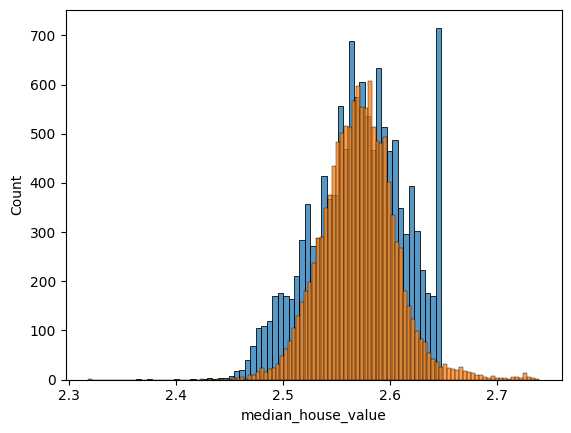

In [78]:
sns.histplot(y_train)
sns.histplot(y_pred);

In [79]:
X_val, y_val = prepare_data_zero(X_val, y_val)

In [80]:
y_pred = w0 + X_val.dot(w)

In [81]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [83]:
np.round(rmse(y_val, y_pred), 2)

0.03

### Fill with mean

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [85]:
def prepare_data_mean(x, y):
    x['total_bedrooms'].replace([np.nan], x['total_bedrooms'].mean(), inplace=True)
    y = np.log1p(y)
    return x, y

In [86]:
X_val, y_val = prepare_data_zero(X_val, y_val)
X_train, y_train = prepare_data_zero(X_train, y_train)

In [87]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
np.round(rmse(y_val, y_pred), 2)

0.34

Filling with 0 gives better RMSE-.